# Regression Diagonstics


So you estimated an effect $\hat{\beta}_1$, great! Now, how can I tell if my model fit the data well. We have learned one way, residuals, but now we are going to take a deeper dive into how to diagnose a regression model. 


Remember the LINE assumptions:

Linear

Independence

Normality

Equal Variance (Homoscedastic) 



### What do residuals look like when we violate the linear assumption?

Let's generate some regression data under an y= 2 + 3 x^2 relationship. 

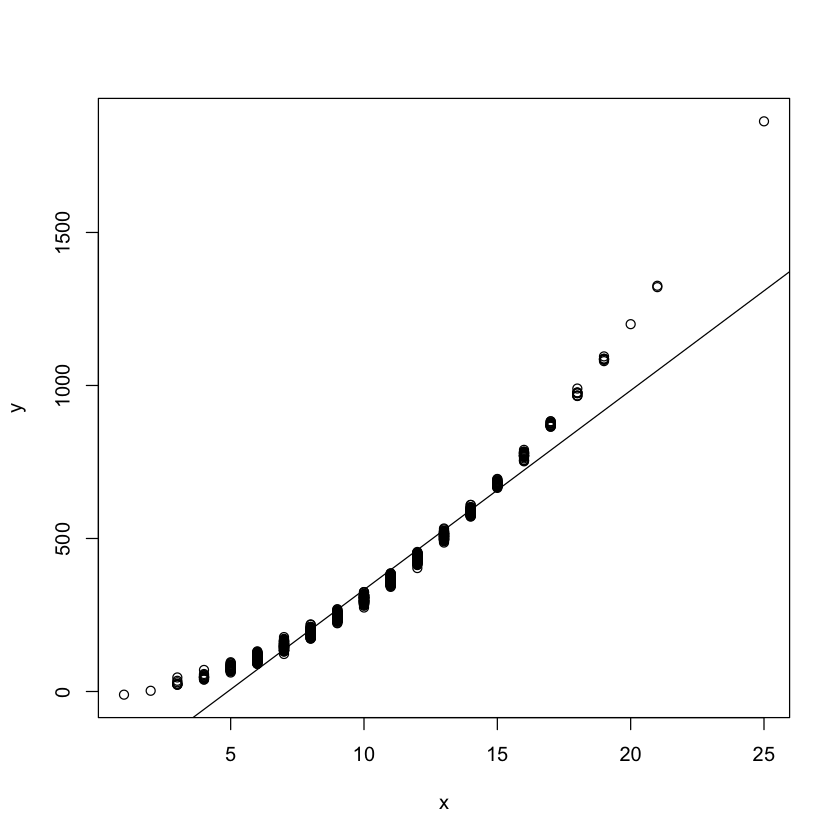

In [72]:
y <- rep(0,1000)
x <- rpois(1000,10)

for (i in 1:1000){
    y[i] <- rnorm(1,2 + 3*x[i]^2,10)
}
plot(x,y)
fit <- lm(y~x)
abline(a=fit$coefficients[1],b=fit$coefficients[2])

[1] -13.5512

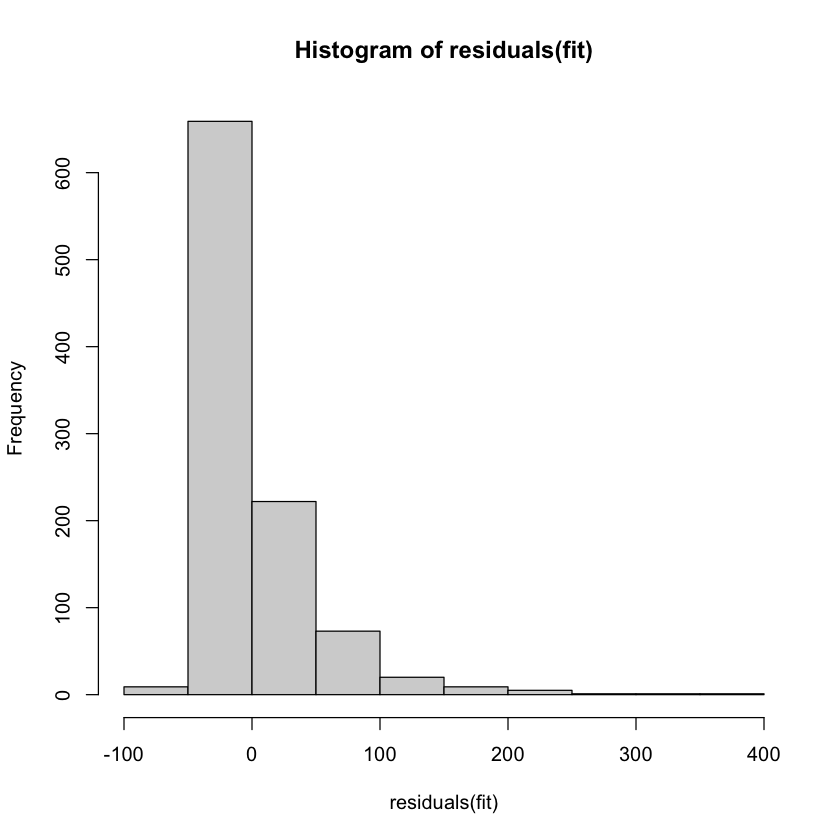

In [71]:
fit <- lm(y~x)
hist(residuals(fit))
median(residuals(fit))

### What do residuals look like when we violate the equal variance assumption?

Let's generate some regression data under an y= 2 + 3 x relationship with changing variance.



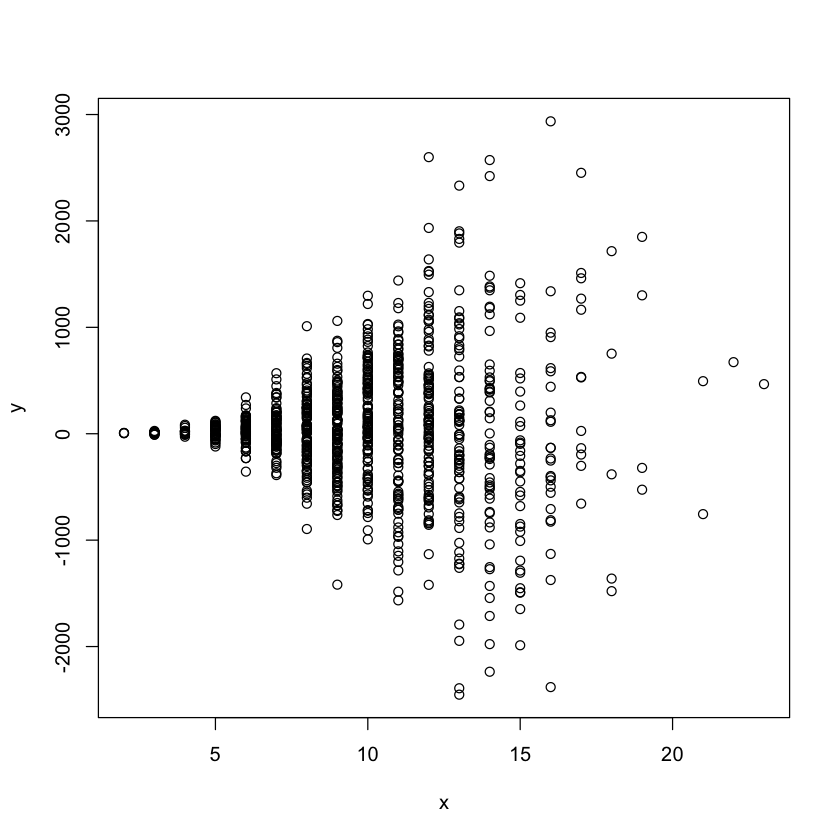

In [73]:
y <- rep(0,1000)
x <- sort(rpois(1000,10))

for (i in 1:1000){
    y[i] <- rnorm(1,2 + 3*x[i],i)
}
plot(x,y)

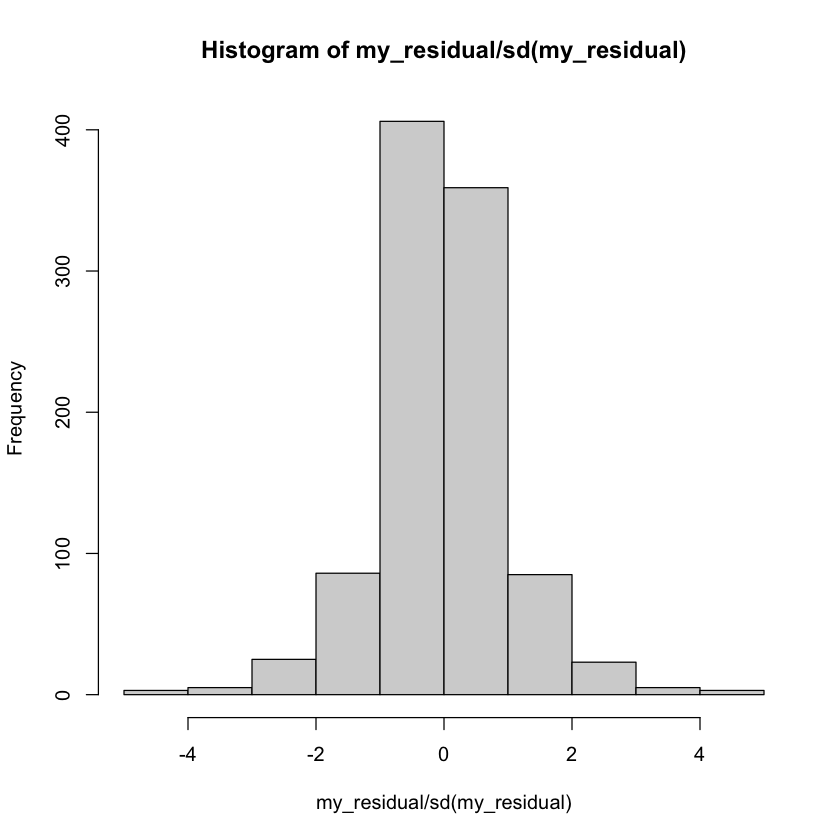

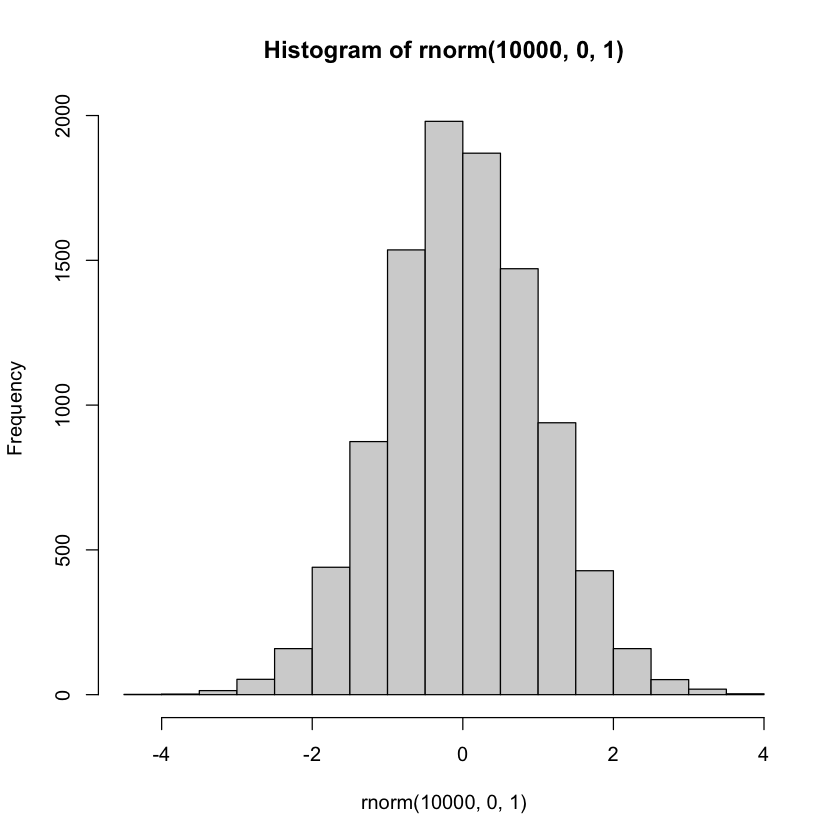

In [76]:
my_residual <- residuals(lm(y~x))
hist(my_residual/sd(my_residual))
hist(rnorm(10000,0,1))

In [20]:
sd(residuals(lm(y~x)))

[1] 560.0611

### What do residuals look like when we violate the Independence assumption?

Let's generate some regression data under an $ y_i= 2 + .5 y_{i-1}$ relationship where y depends on the previous y.


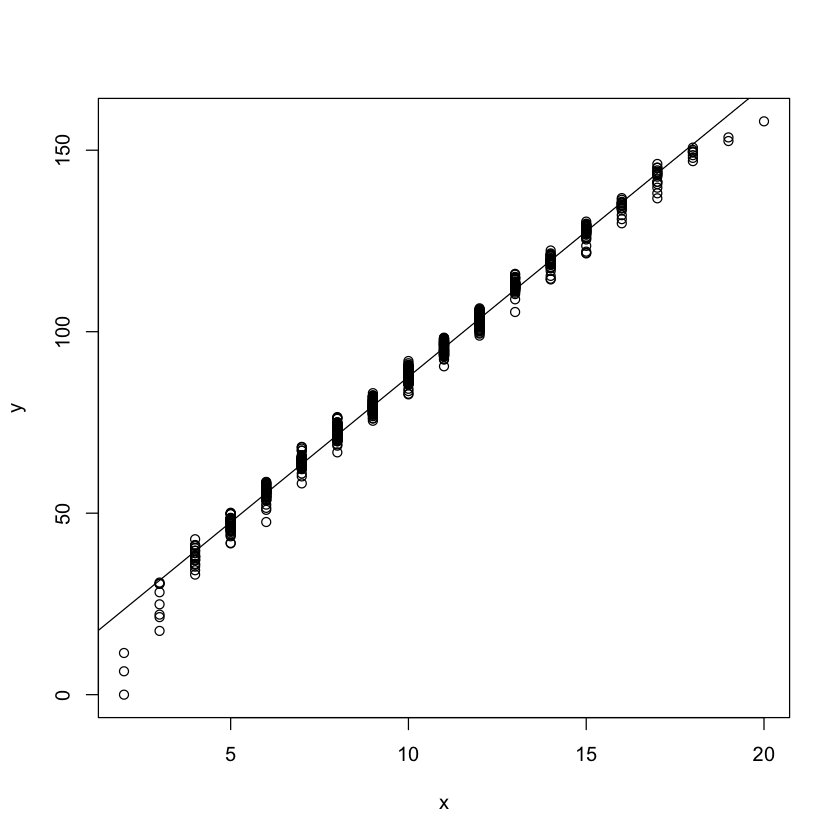

In [81]:
y <- rep(0,1000)
x <- sort(rpois(1000,10))

for (i in 2:1000){
    y[i] <- rnorm(1,2 + .75*y[i-1] + 2*x[i],1)
}

plot(x,y)
fit <- lm(y~x)
abline(a=fit$coefficients[1],b=fit$coefficients[2])

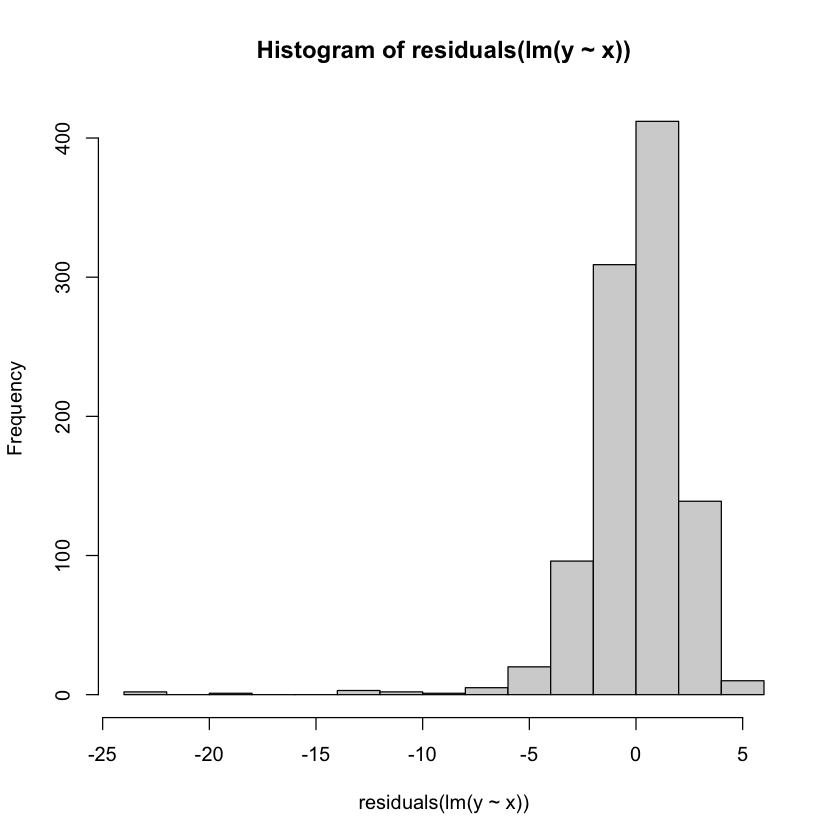

In [80]:
hist(residuals(lm(y~x)))


### What do residuals look like when we violate the normal assumption?

Let's generate some regression data under an y= 2 + 3 x relationship with changing a non-normal distribution.




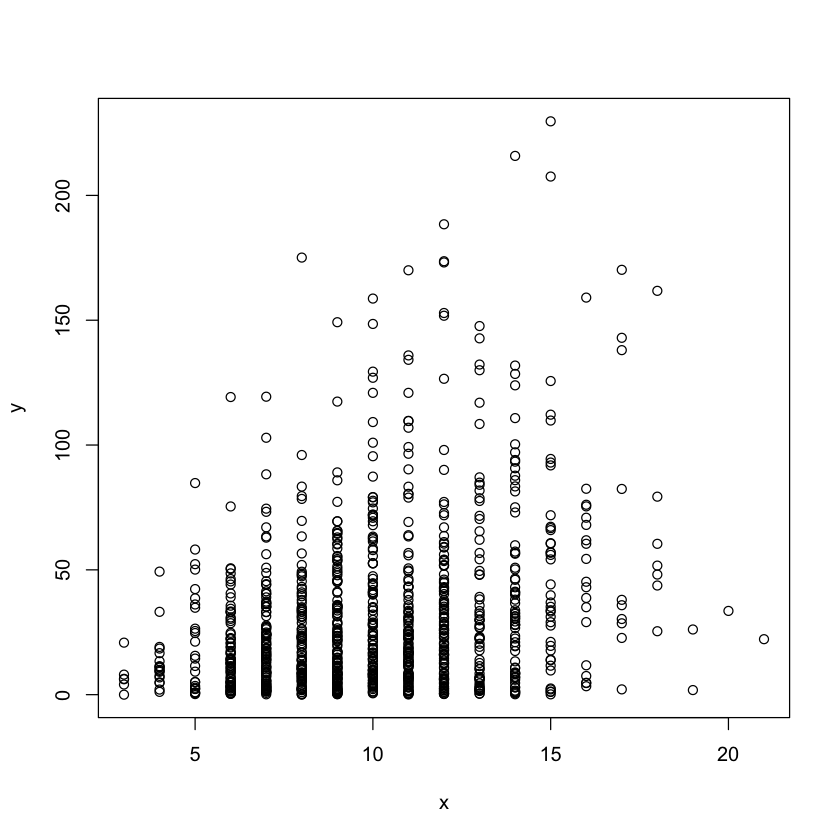

In [84]:
y <- rep(0,1000)
x <- sort(rpois(1000,10))

for (i in 2:1000){
    y[i] <- rexp(1,1/(2 +  3*x[i]))
}




plot(x,y)

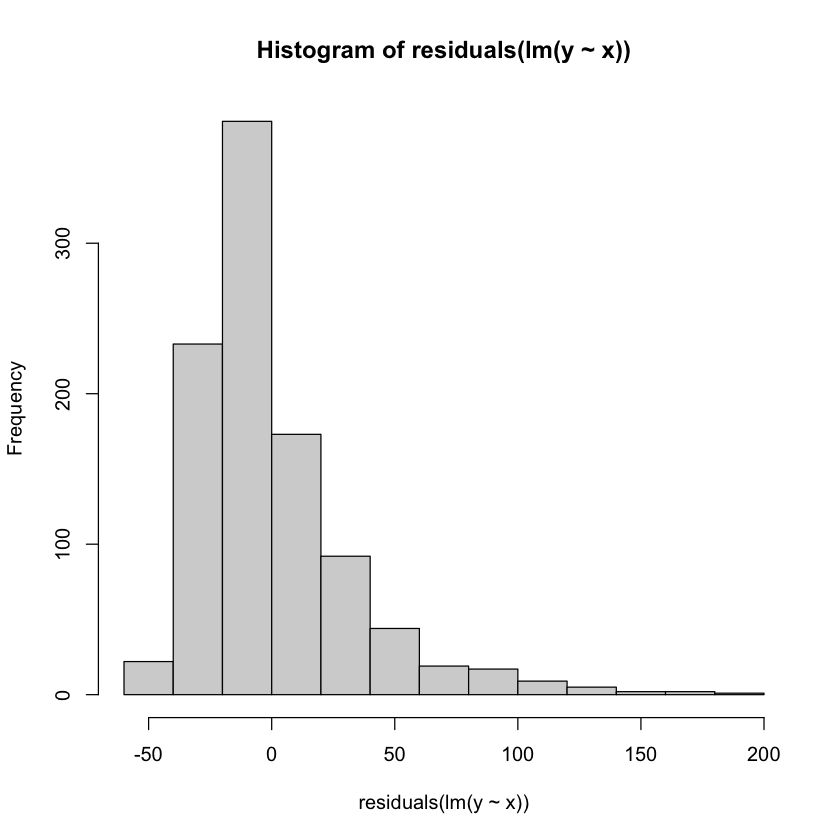

In [85]:
hist(residuals(lm(y~x)))


# Leverage


*Definition* An x value that is far away from the mean of x. 

This is important for identifying influential observations, and deciding whether there is some reason for their ability to influence or "leverage" the results. 



Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0474 -0.6664  0.0019  0.6810  3.6667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.992053   0.103515   19.24   <2e-16 ***
x           2.999356   0.009775  306.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.013 on 998 degrees of freedom
Multiple R-squared:  0.9895,	Adjusted R-squared:  0.9895 
F-statistic: 9.415e+04 on 1 and 998 DF,  p-value: < 2.2e-16


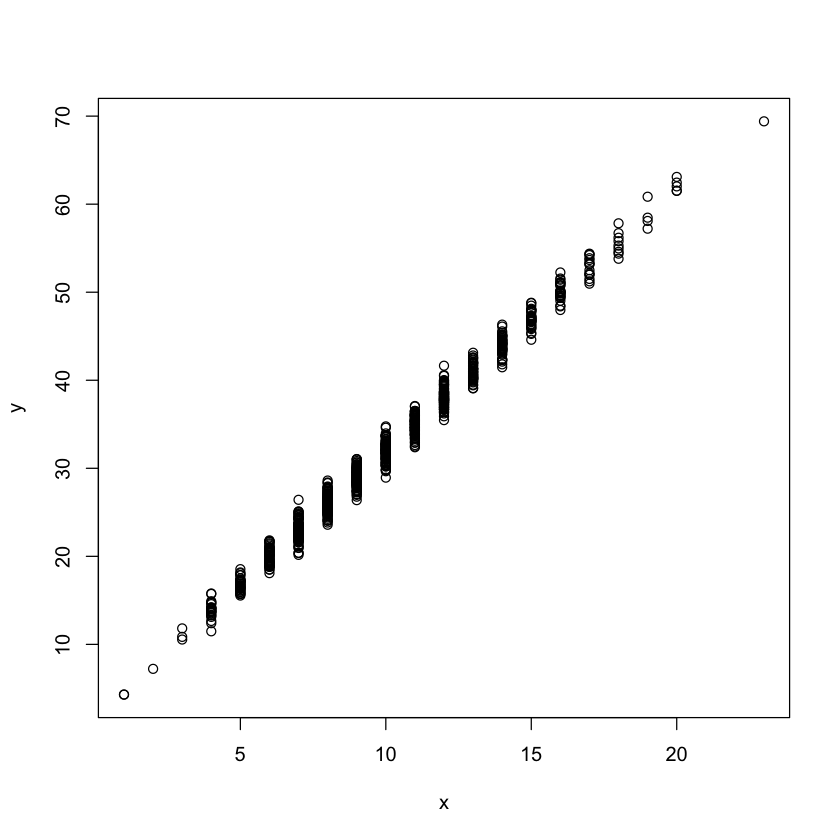

In [101]:
y <- rep(0,1000)
x <- rpois(1000,10)

for (i in 1:1000){
    y[i] <- rnorm(1,2+3*x[i],1)
}

#y <- c(y,rep(mean(y),100))
#x <- c(x,rep(mean(x)+1000,100))
summary(lm(y~x))

plot(x,y)

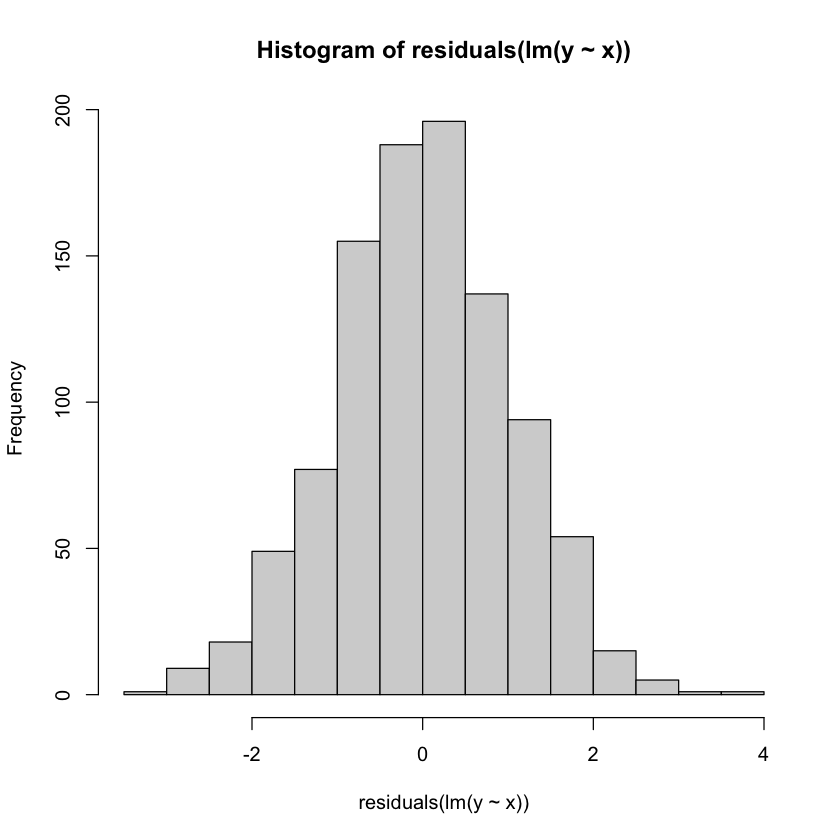

In [102]:
hist(residuals(lm(y~x)))


# QQplot

A quantile is value of a distribution such that X\% of the mass of the distribution is within that value. 



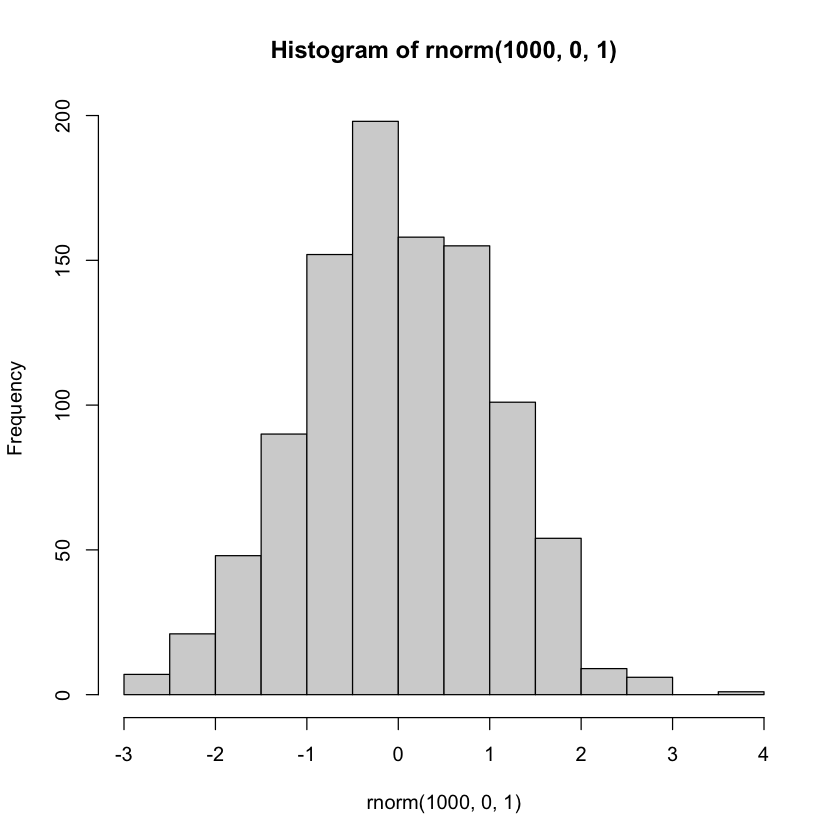

In [107]:
hist(rnorm(1000,0,1))

In [108]:
quantile(rnorm(10000,0,1),probs=.95)

95% 
1.637052

In [110]:
quantile(rnorm(10000,0,1),probs=c(.025,.975))

2.5%     97.5% 
-1.927485  1.984888

Since we know the distribution of residuals is $N(0,\sigma^2)$ we can **standardize** the distribution by dividing by $\sigma$. This yields scaled residuals that follow a $N(0,1)$ distribution.


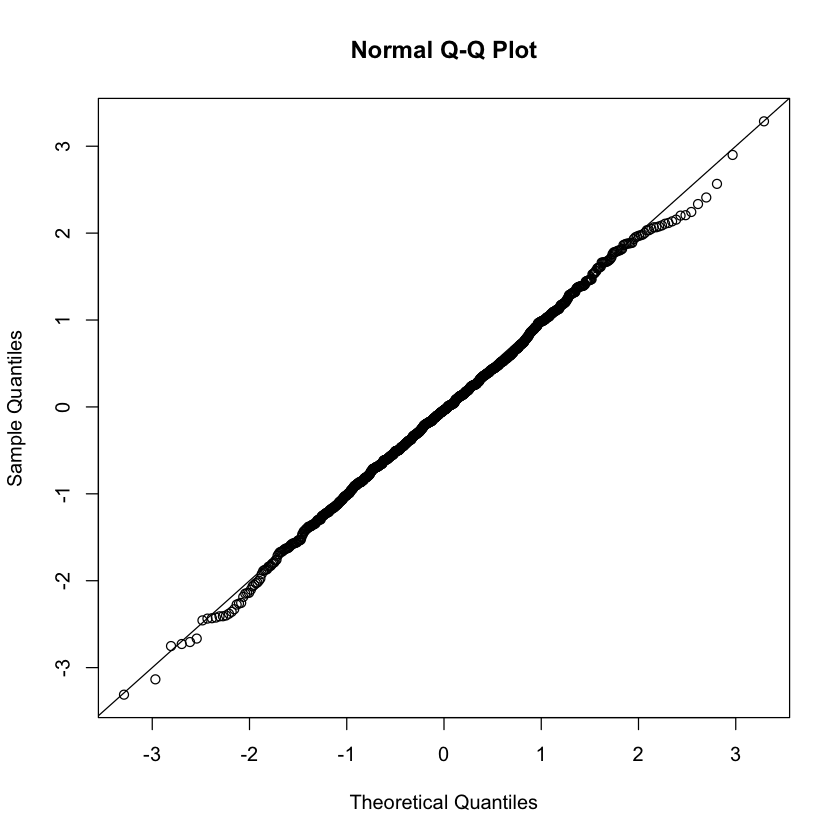

In [114]:
qqnorm(rnorm(1000,0,1))
abline(a=0,b=1)

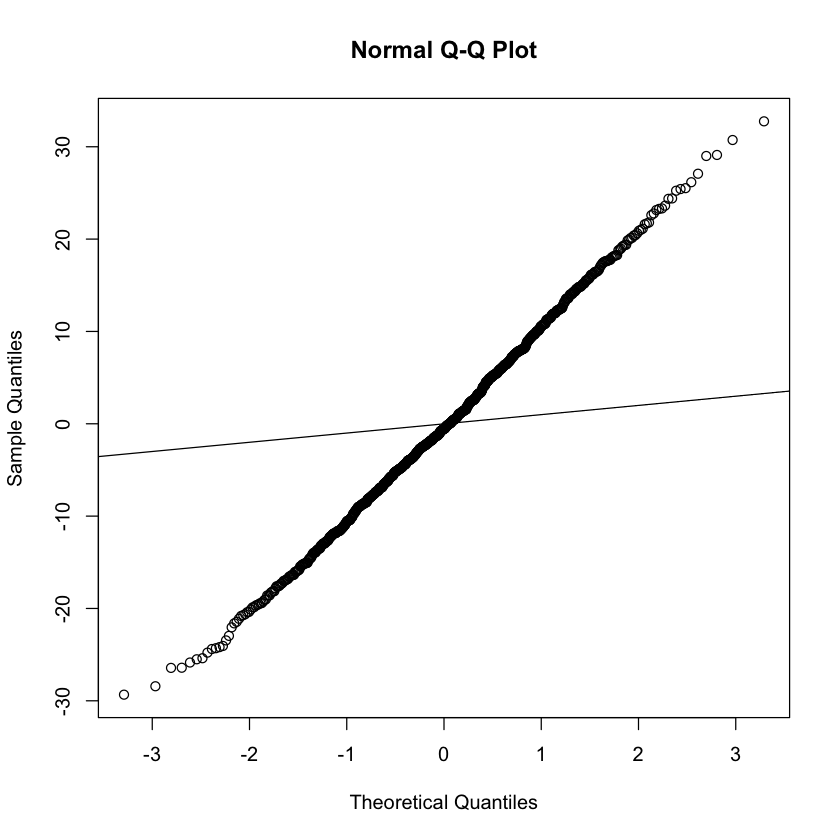

In [115]:
qqnorm(rnorm(1000,0,10))
abline(a=0,b=1)

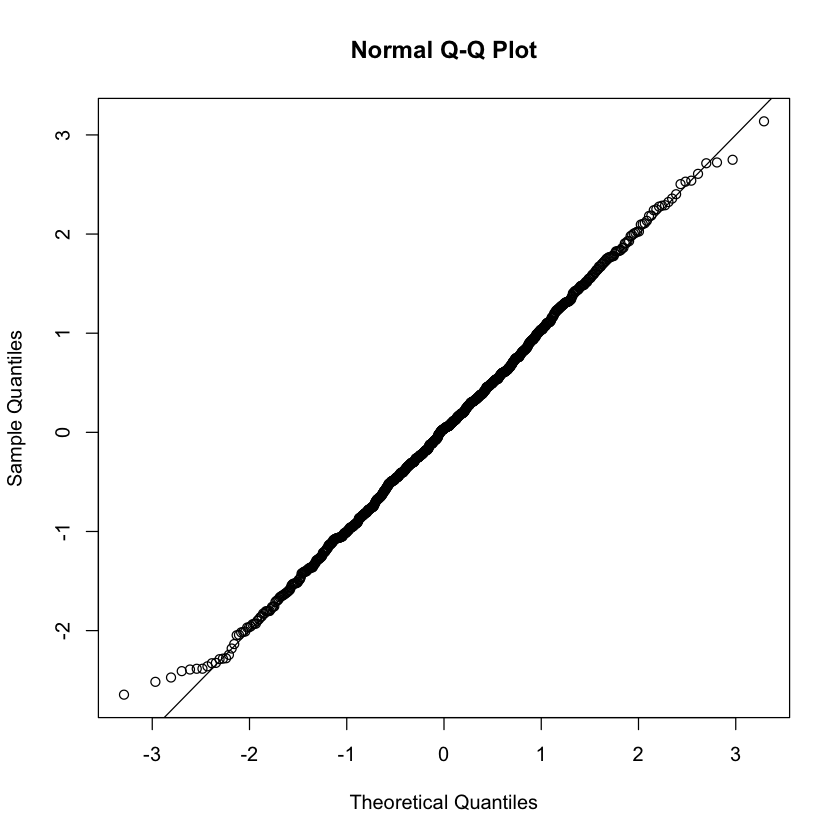

In [116]:
samples <- rnorm(1000,0,10)
qqnorm(samples/sd(samples))
abline(a=0,b=1)

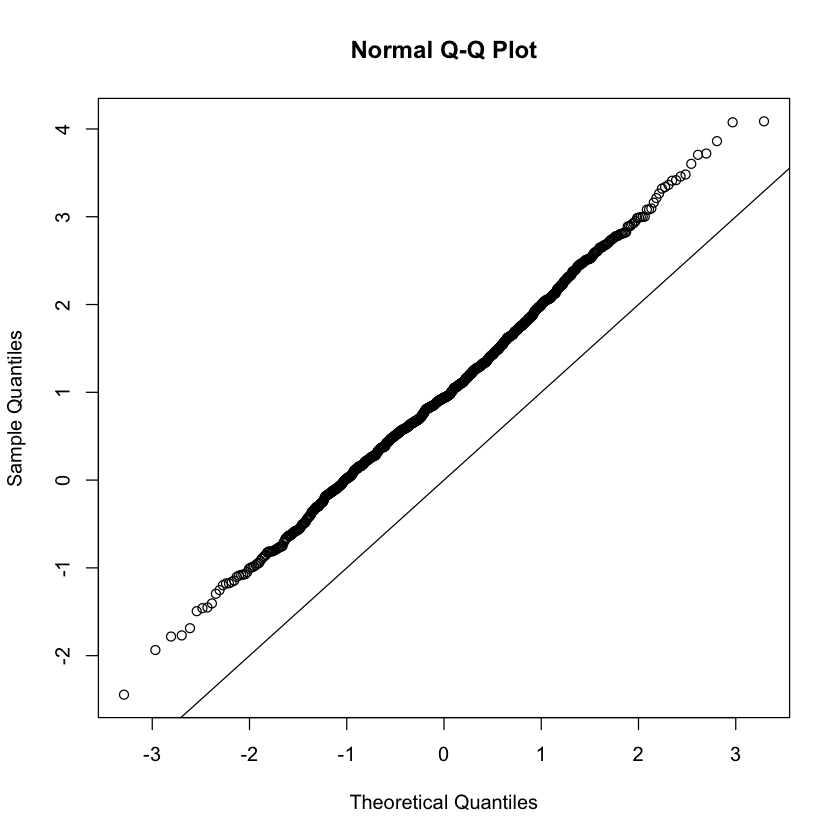

In [117]:
samples <- rnorm(1000,10,10)
qqnorm(samples/sd(samples))
abline(a=0,b=1)

# Real data example


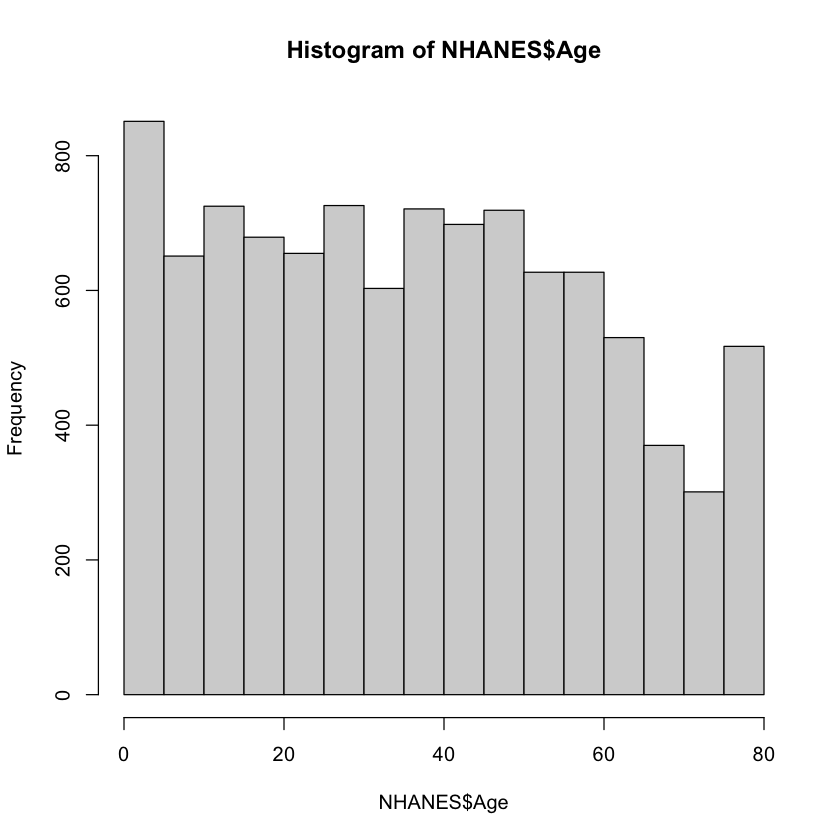

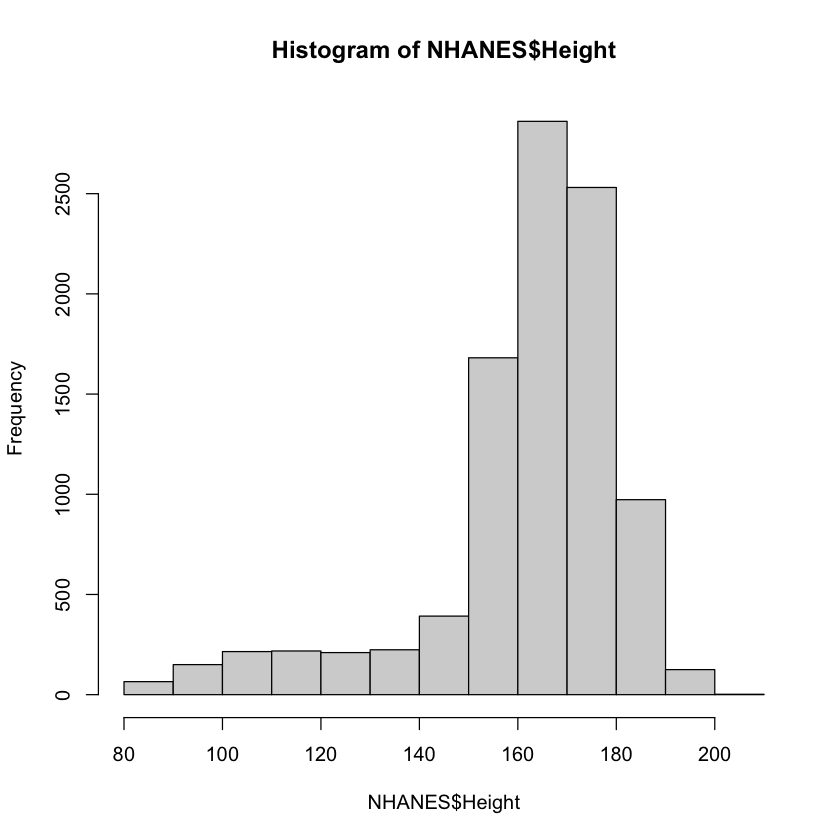

In [103]:
library(NHANES)

hist(NHANES$Age)
hist(NHANES$Height)

In [104]:
fit <- lm(Height ~ Age,data=NHANES)

In [105]:
summary(fit)


Call:
lm(formula = Height ~ Age, data = NHANES)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.053  -9.452   2.659  12.306  45.605 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.458e+02  3.648e-01   399.7   <2e-16 ***
Age         4.260e-01  8.369e-03    50.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.92 on 9645 degrees of freedom
  (353 observations deleted due to missingness)
Multiple R-squared:  0.2118,	Adjusted R-squared:  0.2117 
F-statistic:  2591 on 1 and 9645 DF,  p-value: < 2.2e-16


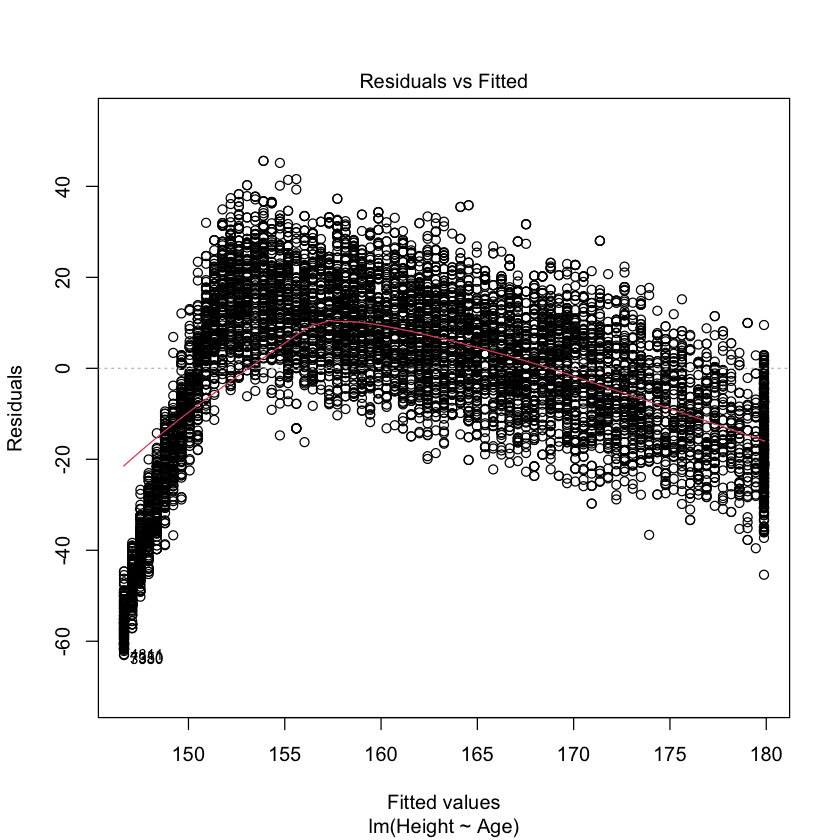

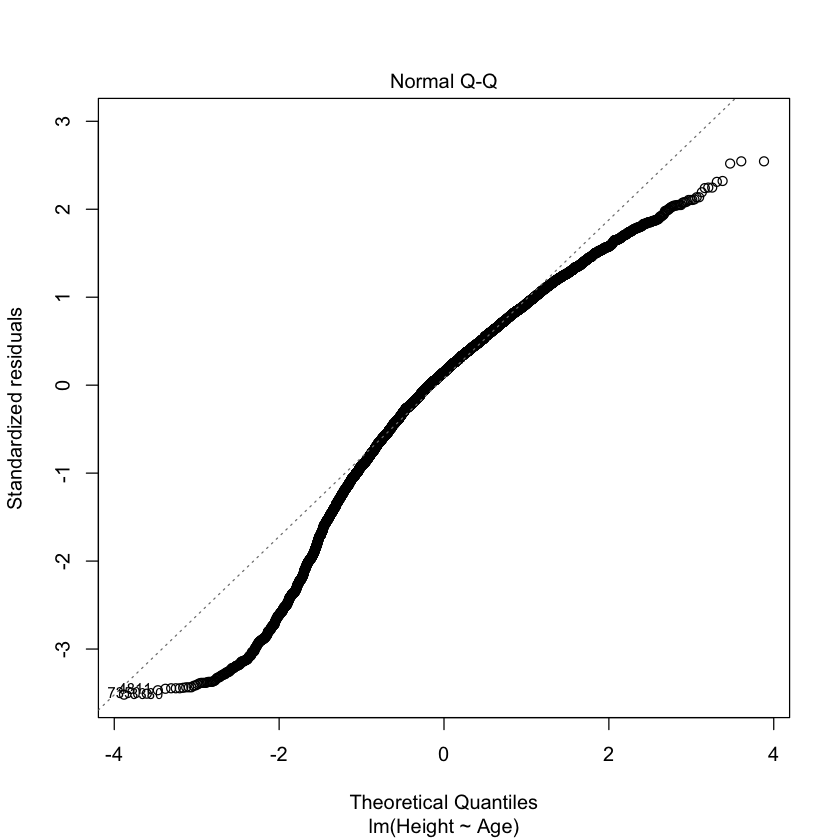

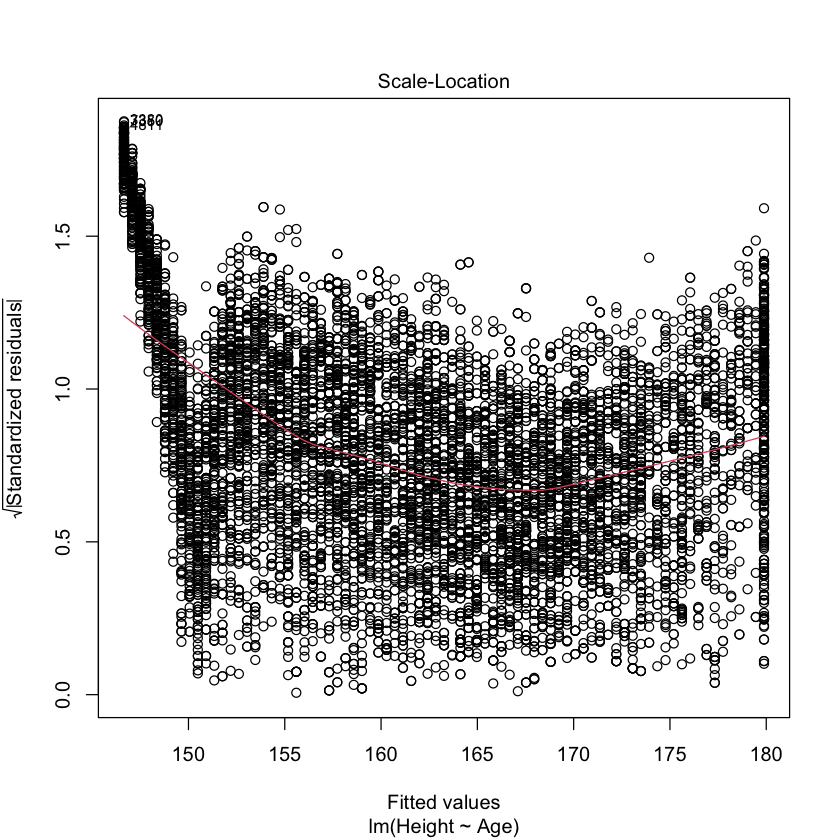

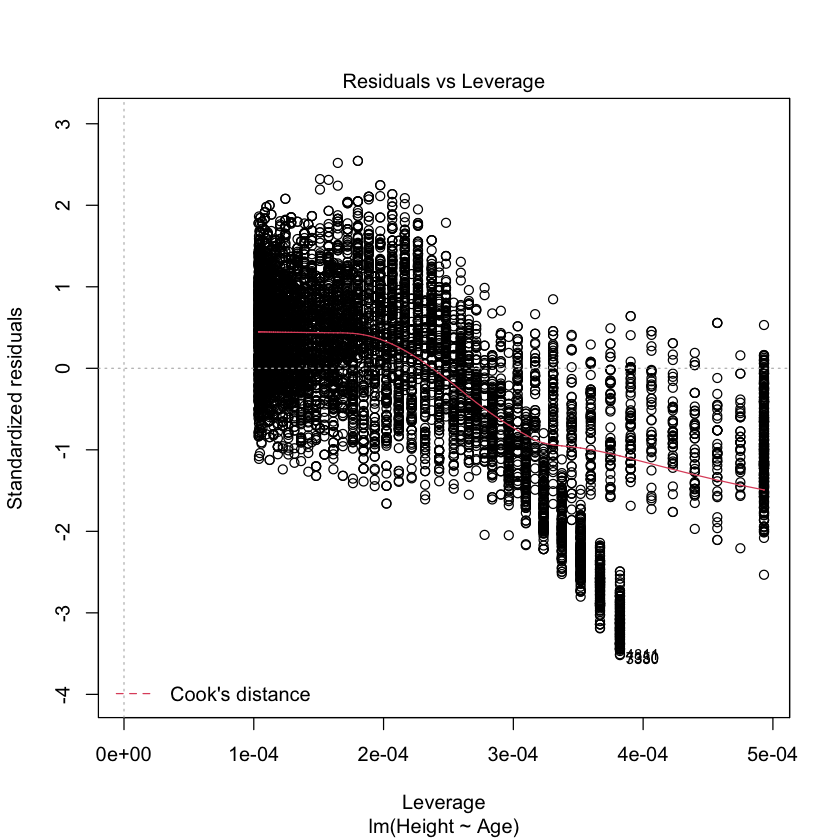

In [106]:
plot(fit)

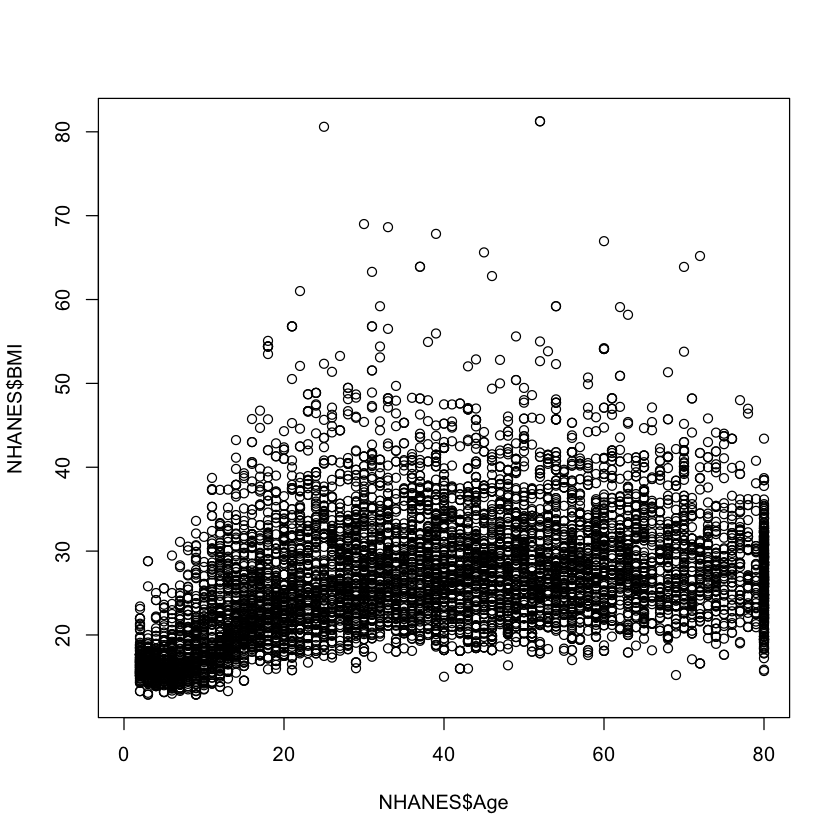

In [62]:
plot(NHANES$Age,NHANES$BMI)